In [1]:
import pandas as pd
import numpy as np
import os
from pandas import Series, DataFrame, Panel
from datetime import datetime


In [2]:

import plotly.plotly as py
import cufflinks as cf



from matplotlib import pyplot


In [3]:
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt

In [23]:
from pylab import rcParams
rcParams['figure.figsize'] = (12,8)

In [11]:
import seaborn as sns

In [5]:
hour_df = pd.read_csv("Hour_float_cleaned.csv")

In [6]:
hour_df.head()

,hour,post,country
0,0.000000,705,venezuela
1,0.016667,812,venezuela
2,0.033333,559,venezuela
3,0.050000,773,venezuela
4,0.066667,693,venezuela


In [12]:
sns.set()

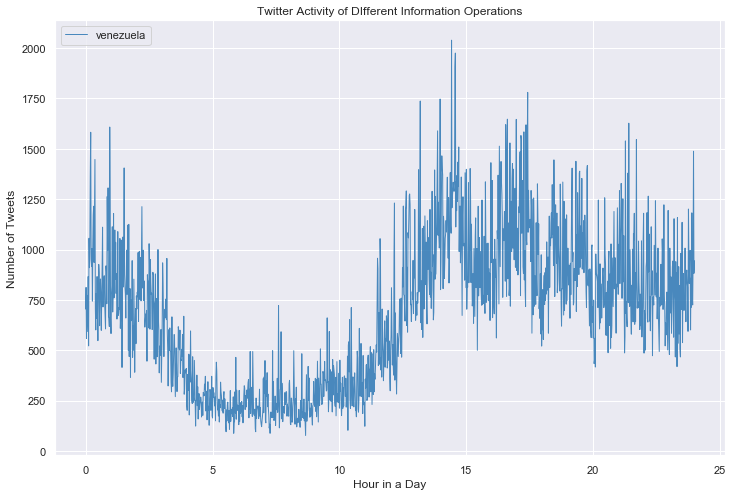

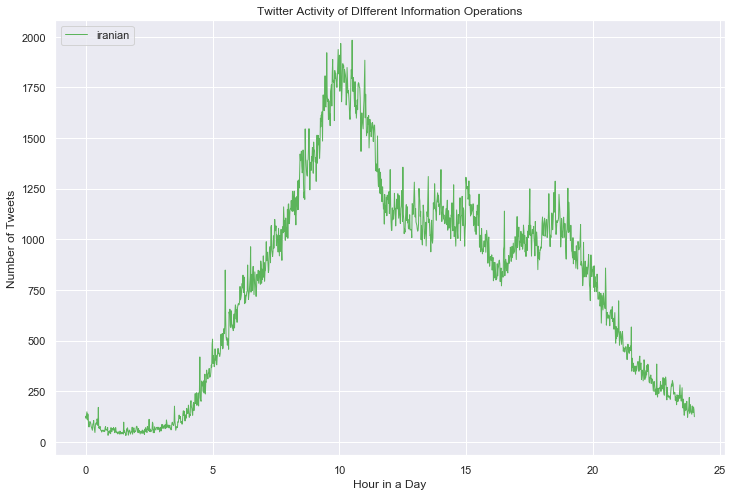

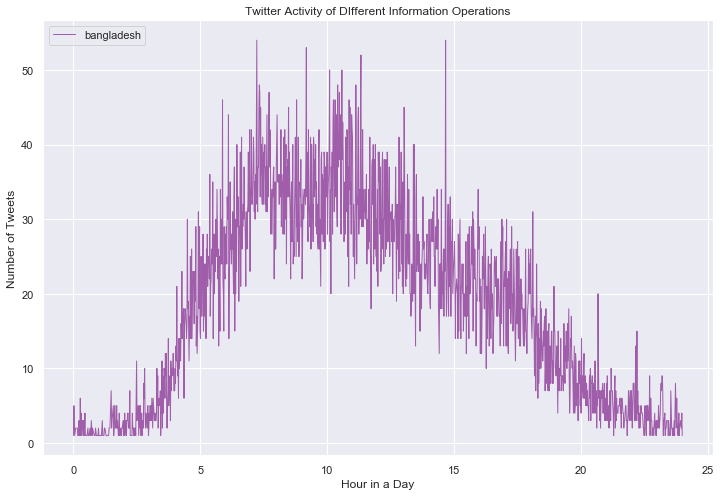

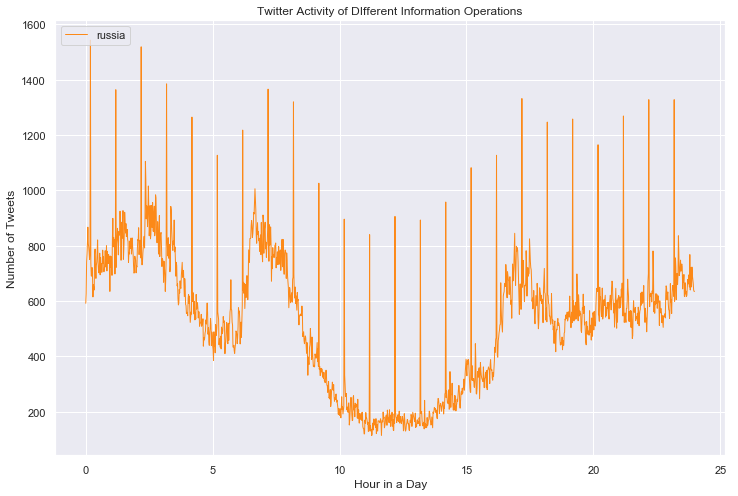

In [33]:
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for c in hour_df['country'].unique():
    num+=1
    temp = hour_df[hour_df.country == c]
    plt.plot(temp.hour, temp.post, color=palette(num), marker='',linewidth=1, alpha=0.9,  label =c)
# plt.plot(year, pop_india, color='orange')
# Add legend
    plt.legend(loc=2, ncol=2)

    plt.xlabel('Hour in a Day')
    plt.ylabel('Number of Tweets')
    plt.title('Twitter Activity of DIfferent Information Operations')
    plt.show()
    
    

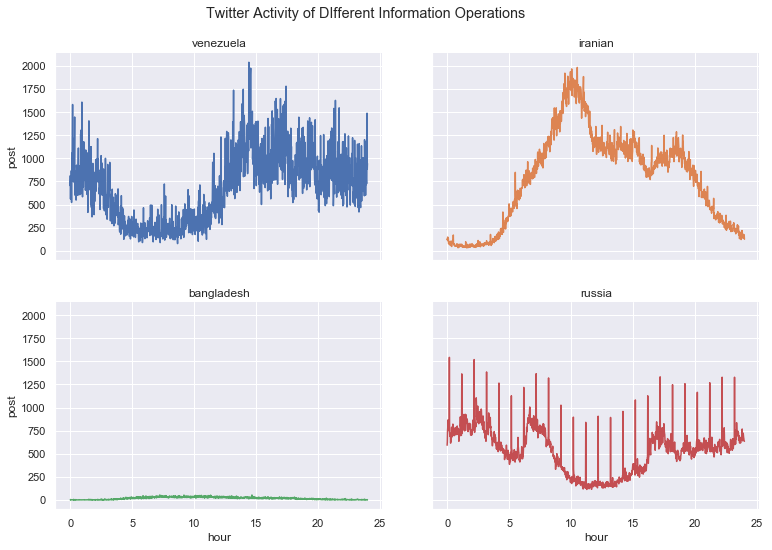

In [32]:

# Create a grid : initialize it
g = sns.FacetGrid(hour_df, col='country', hue='country', col_wrap=2, )
 
# Add the line over the area with the plot function
g = g.map(plt.plot, 'hour', 'post')
 
# Fill the area with fill_between
# g = g.map(plt.fill_between,  'hour', 'post', alpha=0.2).set_titles("{col_name} country")
 
# Control the title of each facet
g = g.set_titles("{col_name}")
g.fig.set_size_inches(12,8)
# Add a title for the whole plo
plt.subplots_adjust(top=0.9)
g = g.fig.suptitle('Twitter Activity of DIfferent Information Operations')

plt.show()

In [92]:
def binning(col, cut_points, labels=None):
    minval = col.min()
    maxval = col.max()
    break_points = [minval] + cut_points + [maxval]
    if not labels:
        labels = range(len(break_points)-1)
    colBin = pd.cut(col,bins=break_points,labels=labels, include_lowest=True)
    return colBin


In [102]:
hour_df = hour_df.astype({'hour_divide':float})

In [36]:
# cut_points = np.arange(0.5,24,step=0.5)

In [84]:
cut_points = [ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
        6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ,
       11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5,
       17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. ,
       22.5, 23. , 23.5]

In [96]:
labels = cut_points +[24]

In [98]:
# cut_points = [0.5,1,1.5]
# labels = cut_points
hour_df["hour_divide"] = binning(hour_df["hour"], cut_points, labels)
# print (pd.value_counts(hour_df["hour_divide"], sort = False))

In [105]:
count_df = DataFrame(pd.crosstab(hour_df.hour_divide, hour_df.country))

In [107]:
count_df.reset_index(level=0, inplace=True)

In [108]:
count_df

country,hour_divide,bangladesh,iranian,russia,venezuela
0,0.5,25,31,31,31
1,1.0,20,30,30,30
2,1.5,22,30,30,30
3,2.0,24,30,30,30
4,2.5,28,30,30,30
5,3.0,29,30,30,30
6,3.5,29,30,30,30
7,4.0,30,30,30,30
8,4.5,30,30,30,30
9,5.0,30,30,30,30


In [110]:
by_hour_country = hour_df.groupby(['hour_divide','country']).agg({'post':'sum'}).reset_index()

In [111]:
by_hour_country

,hour_divide,country,post
0,0.5,bangladesh,53
1,0.5,iranian,2970
2,0.5,russia,23430
3,0.5,venezuela,27653
4,1.0,bangladesh,28
5,1.0,iranian,1718
6,1.0,russia,22134
7,1.0,venezuela,25574
8,1.5,bangladesh,35
9,1.5,iranian,1552


In [100]:
# print (pd.value_counts(hour_df["hour_divide"], sort = False))

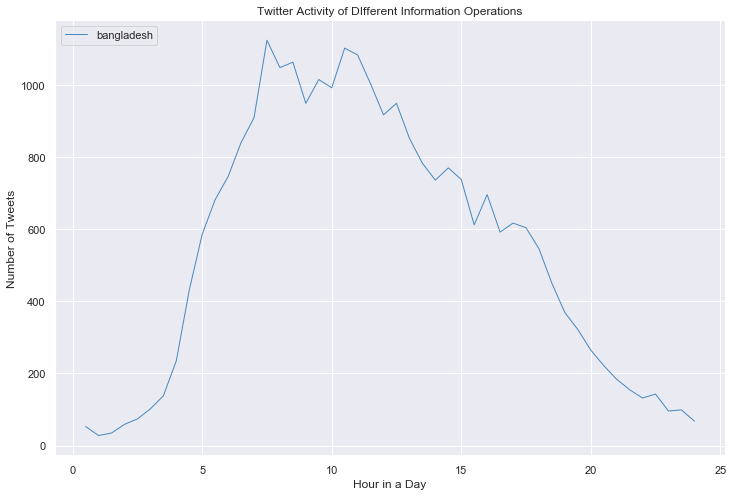

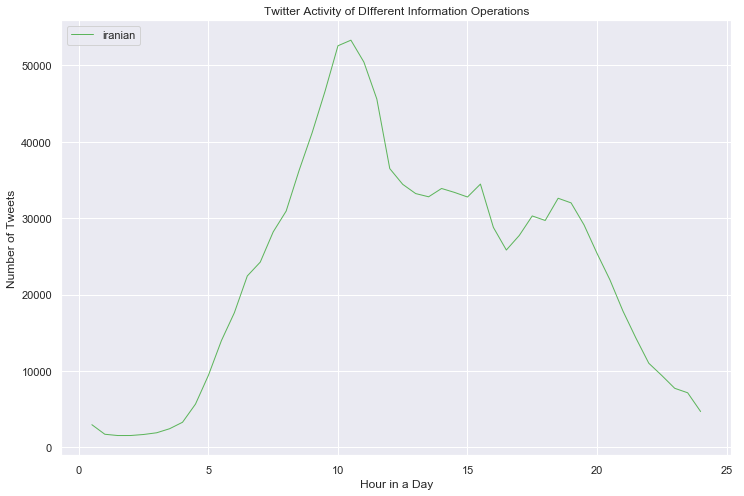

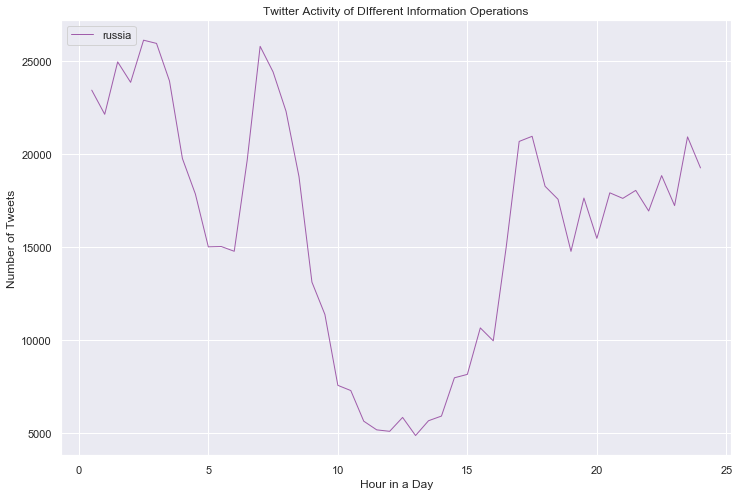

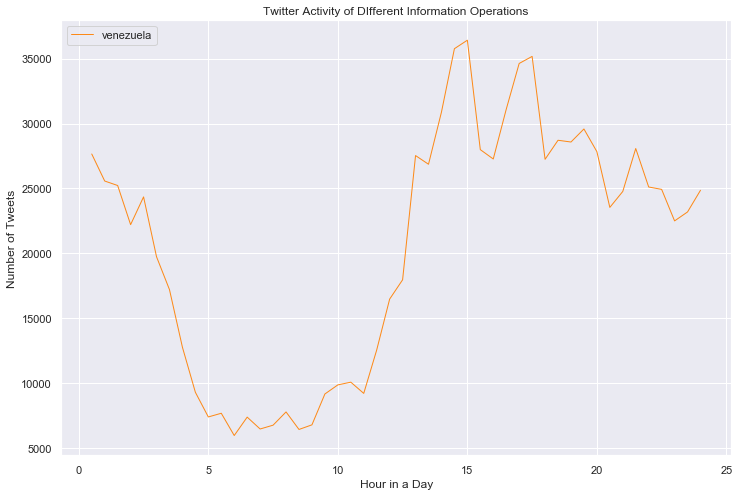

In [112]:
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for c in by_hour_country['country'].unique():
    num+=1
    temp = by_hour_country[by_hour_country.country == c]
    plt.plot(temp.hour_divide, temp.post, color=palette(num), marker='',linewidth=1, alpha=0.9,  label =c)
# plt.plot(year, pop_india, color='orange')
# Add legend
    plt.legend(loc=2, ncol=2)

    plt.xlabel('Hour in a Day')
    plt.ylabel('Number of Tweets')
    plt.title('Twitter Activity of DIfferent Information Operations')
    plt.show()
    

In [153]:
all = {}
for c in by_hour_country['country'].unique():
    peak = 0
    temp = by_hour_country[by_hour_country.country == c]
    for hr in cut_points:
        if hr == 0.5:
            if(temp[temp.hour_divide == 0.5].post.values > temp[temp.hour_divide == 1].post.values  ) and (temp[temp.hour_divide == 0.5].post.values > temp[temp.hour_divide == 24].post.values  ):
                peak += temp[temp.hour_divide == 0.5].post.values
            elif(temp[temp.hour_divide == 24].post.values > temp[temp.hour_divide == 23.5].post.values  ) and (temp[temp.hour_divide == 24].post.values > temp[temp.hour_divide == 0.5].post.values  ):
                peak += temp[temp.hour_divide == 24].post.values
        else:    
            if (temp[temp.hour_divide == hr].post.values > temp[temp.hour_divide == (hr+0.5)].post.values) and (temp[temp.hour_divide == hr].post.values > temp[temp.hour_divide == (hr-0.5)].post.values):
                peak += temp[temp.hour_divide == hr].post.values
    
    all[c] = (peak)/(temp.post.sum())
    print('Country : ', c, ' -> ', all[c])

Country :  bangladesh  ->  [0.28908217]
Country :  iranian  ->  [0.16439049]
Country :  russia  ->  [0.32164559]
Country :  venezuela  ->  [0.27462893]


In [ ]:
 and (temp[temp.hour_divide == hr].post >temp[temp.hour_divide == (hr-0.5)].post)

In [131]:
by_hour_country = by_hour_country.reset_index(drop=True) 

In [132]:
by_hour_country.columns

Index(['hour_divide', 'country', 'post'], dtype='object')

In [142]:
a=by_hour_country[(by_hour_country.country == 'iranian') & (by_hour_country.hour_divide==0.5)].post 

In [149]:
b = by_hour_country[(by_hour_country.country == 'iranian') & (by_hour_country.hour_divide==1)].post 

In [150]:
if (a.values > b.values):
    print("hello")

hello


In [141]:
by_hour_country =by_hour_country.astype({'country':str})